In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
y_train[0]

5

In [9]:
import matplotlib.pyplot as plt

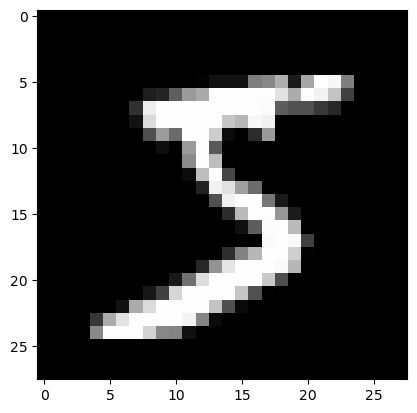

In [12]:
plt.imshow(x_train[0],cmap='grey')

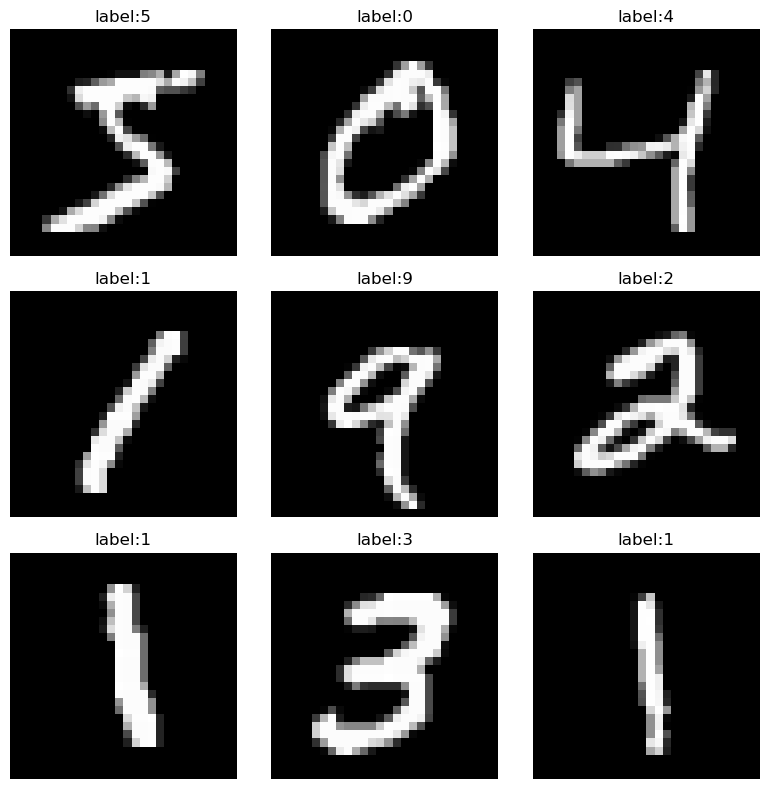

In [17]:
fig,axs = plt.subplots(3,3,figsize=(8,8))
for i,ax in enumerate(axs.flat):
    ax.imshow(x_train[i],cmap='grey')
    ax.set_title(f'label:{y_train[i]}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### scale the data 

In [18]:
x_train = x_train/255

In [19]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [20]:
x_test = x_test/255

#### Reshape Input
To use CNNs, you need to add a channel dimension to the images. MNIST images are grayscale, so the channel dimension is 1.



In [21]:
x_train[0].shape

(28, 28)

In [23]:
import numpy as np
x_train = np.expand_dims(x_train,axis=-1)    # Shape becomes (num_samples, 28, 28, 1)
x_test = np.expand_dims(x_test,axis=-1)

In [24]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

 dataset is ready for training a CNN! 

#### Build CNN model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense,Input


In [27]:
model = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dropout(0.2),
    Dense(10,activation='softmax')
        
    
])



# model.compile()

In [28]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
hist = model.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9905 - loss: 0.0297 - val_accuracy: 0.9868 - val_loss: 0.0445
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.9926 - loss: 0.0240 - val_accuracy: 0.9872 - val_loss: 0.0485
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9882 - val_loss: 0.0499
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9933 - loss: 0.0201 - val_accuracy: 0.9857 - val_loss: 0.0555
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9950 - loss: 0.0150 - val_accuracy: 0.9875 - val_loss: 0.0575
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9952 - loss: 0.0148 - val_accuracy: 0.9868 - val_loss: 0.0581
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 54s 32ms/step - accuracy: 0.9944 - loss: 0.0171 - val_accuracy: 0.9870 - val_loss: 0.0539
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 30ms/step - accuracy: 0.9963 -

In [32]:
hist.history

{'accuracy': [0.9901852011680603,
  0.9922037124633789,
  0.9926111102104187,
  0.9925370216369629,
  0.9940555691719055,
  0.9942222237586975,
  0.9944074153900146,
  0.9952777624130249,
  0.9951481223106384,
  0.9960185289382935],
 'loss': [0.030658530071377754,
  0.026211559772491455,
  0.023063240572810173,
  0.022817160934209824,
  0.018647100776433945,
  0.01785656251013279,
  0.017474066466093063,
  0.014796888455748558,
  0.015678267925977707,
  0.013026879169046879],
 'val_accuracy': [0.9868333339691162,
  0.9871666431427002,
  0.9881666898727417,
  0.9856666922569275,
  0.987500011920929,
  0.9868333339691162,
  0.9869999885559082,
  0.9863333106040955,
  0.9888333082199097,
  0.9890000224113464],
 'val_loss': [0.04449367895722389,
  0.048521608114242554,
  0.04985667020082474,
  0.055522818118333817,
  0.05747351422905922,
  0.05806107074022293,
  0.05394941195845604,
  0.06314566731452942,
  0.059589385986328125,
  0.05419937148690224]}

In [33]:
train_accuracy = hist.history['accuracy']

In [34]:
val_accuracy = hist.history['val_accuracy']

In [35]:
train_loss = hist.history['loss']

In [36]:
val_loss = hist.history['val_loss']

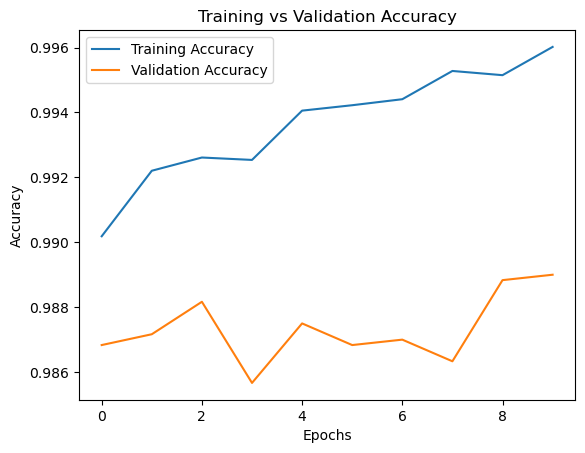

In [37]:
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

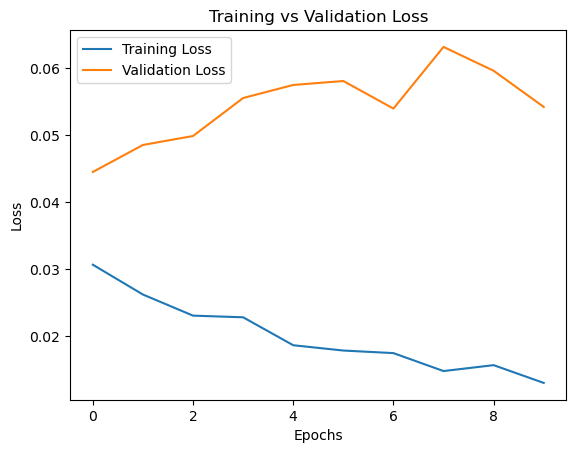

In [38]:
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [39]:
model_1 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
        
    
])


In [40]:
model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [41]:
hist_1 = model_1.fit(x_train,y_train,batch_size=32,epochs=10,validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 34ms/step - accuracy: 0.7604 - loss: 0.7216 - val_accuracy: 0.9743 - val_loss: 0.0861
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9622 - loss: 0.1356 - val_accuracy: 0.9793 - val_loss: 0.0701
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9737 - loss: 0.0941 - val_accuracy: 0.9785 - val_loss: 0.0692
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9797 - loss: 0.0711 - val_accuracy: 0.9828 - val_loss: 0.0578
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9821 - loss: 0.0609 - val_accuracy: 0.9840 - val_loss: 0.0553
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 34ms/step - accuracy: 0.9860 - loss: 0.0465 - val_accuracy: 0.9857 - val_loss: 0.0547
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 59s 35ms/step - accuracy: 0.9873 - loss: 0.0432 - val_accuracy: 0.9888 - val_loss: 0.0434
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 58s 34ms/step - accuracy: 0.9885 -

In [42]:
hist_1.history

{'accuracy': [0.8845000267028809,
  0.9655185341835022,
  0.9741111397743225,
  0.9792777895927429,
  0.9830555319786072,
  0.9842036962509155,
  0.9870555400848389,
  0.9879999756813049,
  0.9897037148475647,
  0.9902036786079407],
 'loss': [0.3676447570323944,
  0.12312571704387665,
  0.09215185791254044,
  0.07183883339166641,
  0.06103735417127609,
  0.05208684504032135,
  0.04331260547041893,
  0.040190670639276505,
  0.03494061529636383,
  0.03181089833378792],
 'val_accuracy': [0.9743333458900452,
  0.9793333411216736,
  0.9785000085830688,
  0.9828333258628845,
  0.984000027179718,
  0.9856666922569275,
  0.9888333082199097,
  0.9886666536331177,
  0.9888333082199097,
  0.9879999756813049],
 'val_loss': [0.08610799908638,
  0.07007553428411484,
  0.06923078745603561,
  0.057821374386548996,
  0.055262114852666855,
  0.054743047803640366,
  0.04339592531323433,
  0.046399105340242386,
  0.0447867214679718,
  0.0527249239385128]}

In [43]:
train_accuracy_1 = hist_1.history['accuracy']

In [44]:
val_accuracy_1 = hist_1.history['val_accuracy']
train_loss_1 = hist_1.history['loss']
val_loss_1 = hist_1.history['val_loss']

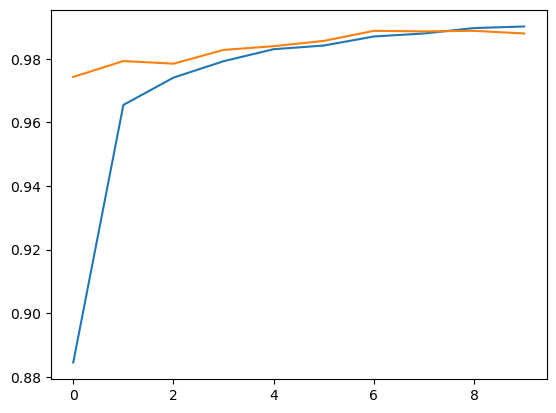

In [46]:
plt.plot(train_accuracy_1)
plt.plot(val_accuracy_1)

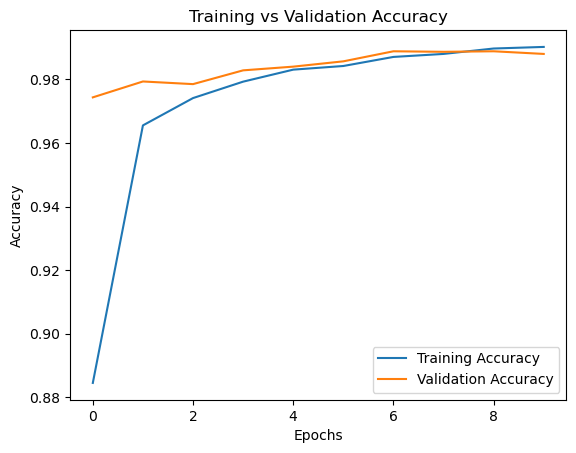

In [47]:
plt.plot(train_accuracy_1, label='Training Accuracy')
plt.plot(val_accuracy_1, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

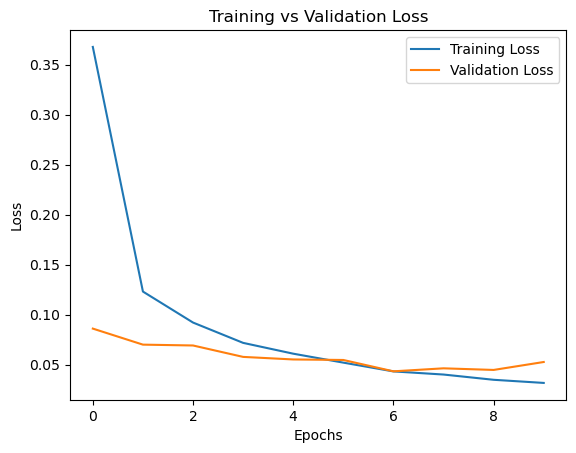

In [48]:
plt.plot(train_loss_1, label='Training Loss')
plt.plot(val_loss_1, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

## Predictions

In [49]:
x_test

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [50]:
predictions = model_1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [51]:
predictions

array([[3.61174220e-17, 5.79016080e-09, 1.19616694e-09, ...,
        1.00000000e+00, 4.25073049e-14, 2.56394739e-10],
       [9.79200188e-09, 6.16956597e-10, 9.99999881e-01, ...,
        1.06503684e-07, 1.21208306e-08, 9.05026041e-14],
       [9.22929268e-12, 9.99999285e-01, 5.22716048e-09, ...,
        5.74856074e-07, 1.19351844e-08, 1.39156769e-10],
       ...,
       [3.71949179e-23, 6.72093793e-15, 1.59530105e-18, ...,
        1.42313995e-18, 9.28971830e-12, 7.51593171e-15],
       [1.19040518e-15, 1.08278983e-14, 1.26980039e-14, ...,
        1.18966889e-16, 2.30828794e-11, 3.40610540e-10],
       [1.14162617e-08, 1.29289835e-13, 4.44588431e-13, ...,
        3.62022337e-18, 2.08229389e-09, 6.52247093e-12]], dtype=float32)

predictions actually refers to the probabilities of 0-9

In [54]:
np.argmax(predictions[0])

7

In [57]:
pred_class = np.argmax(predictions,axis=1)

In [58]:
pred_class

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [59]:
for i in range(5):
    print(f'class_label:{y_test[i]},predicted_class:{pred_class[i]} ')

class_label:7,predicted_class:7 
class_label:2,predicted_class:2 
class_label:1,predicted_class:1 
class_label:0,predicted_class:0 
class_label:4,predicted_class:4 


In [60]:
model_1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9840 - loss: 0.0701


[0.058915283530950546, 0.9861999750137329]

In [61]:
loss,accuracy = model_1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9840 - loss: 0.0701


In [63]:
print(f'test_Acc:{accuracy:.2f}')

test_Acc:0.99
